# Quick example of plotting a normed confustion matrix!

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [38]:
def plot_raw_norm_confusion(df):
    '''
    Given a prediction df of each example, it's "truth" class
    and its "predicted" class, create a pair of confusion 
    matrices with their raw and normed counts
    '''
    
    # initialize a 2-part matplotlib figure
    f, axes = plt.subplots(1, 2, figsize=(8, 4))
    
    # collect pair of confusion matrices
    mats = []
    
    # +-----------------------+
    # | Build raw conf matrix |
    # +-----------------------+
    conf_raw = confusion_matrix(df['truth'],df['pred'])
    mats.append((conf_raw,"raw counts"))
    
    
    # +--------------------------+
    # | Build normed conf matrix |
    # +--------------------------+
    
    # initialize np array of 0s of same shape as conf_raw
    conf_norm = np.zeros(conf_raw.shape)
    
    # for each true class label (i):
    for i,row in enumerate(conf_raw):
        # total data points
        rowsum = sum(row)
        # for each predicted class label (j):
        for j,item in enumerate(row):
            # normalize each value to 1 by dividing 
            # it by the total # of values in the row
            normed_val = item/rowsum
            # replace the position in the np.zeroes matrix 
            # with the normed value
            conf_norm[i][j] = normed_val
    
    mats.append((conf_norm,"normed counts"))
    
    # for each matrix, add it to a matplotlib plot
    for i,(mat,title) in enumerate(mats):
        disp = ConfusionMatrixDisplay(confusion_matrix=mat)
        # put the display on the correct subplot
        disp.plot(ax=axes[i])
        # set the title of this subplot
        disp.ax_.set_title(f"{title}")

    # Use a title that spans both subplots
    f.suptitle("Confusion Matrix for [Model Name]",fontsize=20)
    # squish the whitespace between plots nicely
    plt.tight_layout()


In [49]:
fake_data = {
    # each example in your data (like an index)
    'sample_id': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
    # actual class value of each sample
    'truth': [1,1,1,1,1,0,1,1,1,2,0,0,0,1,2,0,2,0,2,1,1,2,1,1,1,1,1,2,1,0],
    # class values predicted by a model
    'pred': [1,2,1,1,1,2,1,1,1,2,0,1,0,1,2,0,2,0,2,1,1,2,0,1,1,1,1,2,2,0]
}

pred_df = pd.DataFrame(fake_data)
pred_df

,sample_id,truth,pred
0,1,1,1
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,1
5,6,0,2
6,7,1,1
7,8,1,1
8,9,1,1
9,10,2,2


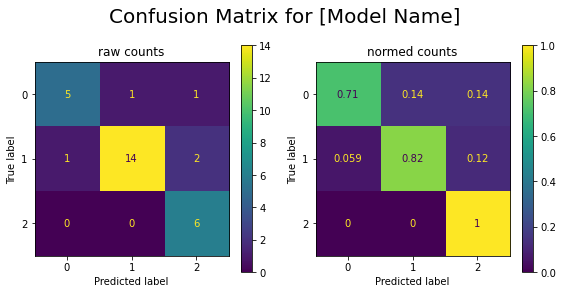

In [50]:
plot_raw_norm_confusion(pred_df)

Notice how in the raw matrix, Class 1 appears is most emphasized because it has the most samples, but in fact Class 2 had perfect recall! (Nothing actually labeled Class 2 were predicted as Class 0 or 1). This is easier to see by color in the normed matrix. 

In [51]:
# you may also be interested in the classification report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
report = classification_report(
    pred_df['truth'], 
    pred_df['pred'],
    target_names=[0,1,2],
    output_dict=True
)

pd.DataFrame(report)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.833333,0.933333,0.666667,0.833333,0.811111,0.856667
recall,0.714286,0.823529,1.000000,0.833333,0.845938,0.833333
f1-score,0.769231,0.875000,0.800000,0.833333,0.814744,0.835321
support,7.000000,17.000000,6.000000,0.833333,30.000000,30.000000
